In [1]:
import xarray as xr
from soilprofile2D import wrc
from parameters import soilprofiles
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = r'/scratch/project_2000908/nousu/SpaFHy_RESULTS/testcase_input_202401251408.nc'
results = xr.open_dataset(file)

In [3]:
# subsetting some of the variables
firedata = results[['parameters_soilclass',
                    'forcing_wind_speed', 'forcing_air_temperature', 'forcing_relative_humidity', 
                    'bucket_moisture_root', 'bucket_moisture_top']].copy()
firedata

<xarray.Dataset>
Dimensions:                    (lat: 250, lon: 375, time: 14975)
Coordinates:
  * time                       (time) datetime64[ns] 1981-01-01 ... 2021-12-31
  * lat                        (lat) float64 6.865e+06 6.865e+06 ... 6.857e+06
  * lon                        (lon) float64 3.48e+05 3.48e+05 ... 3.6e+05
Data variables:
    parameters_soilclass       (lat, lon) float32 ...
    forcing_wind_speed         (time) float32 ...
    forcing_air_temperature    (time) float32 ...
    forcing_relative_humidity  (time) float32 ...
    bucket_moisture_root       (time, lat, lon) float32 ...
    bucket_moisture_top        (time, lat, lon) float32 ...
Attributes:
    description:  SpaFHy results : final_run
    history:      created 2024-01-25 14:08:44
    source:       modified SpaFHy

In [4]:
# for calculating water potential
soilprofiles()
pFs = {1: soilprofiles()['CoarseTextured']['pF'],
        2: soilprofiles()['MediumTextured']['pF'],
        4: soilprofiles()['Peat']['pF']}
soiltype = np.ravel(firedata['parameters_soilclass'])
watpot = np.zeros(soiltype.shape)*np.nan
wat_pot_array = np.zeros(firedata['bucket_moisture_root'].shape)*np.nan

In [5]:
pFs

{1: {'ThetaS': [0.41], 'ThetaR': [0.05], 'alpha': [0.024], 'n': [1.2]},
 2: {'ThetaS': [0.43], 'ThetaR': [0.05], 'alpha': [0.024], 'n': [1.2]},
 4: {'ThetaS': [0.88], 'ThetaR': [0.196], 'alpha': [0.072], 'n': [1.255]}}

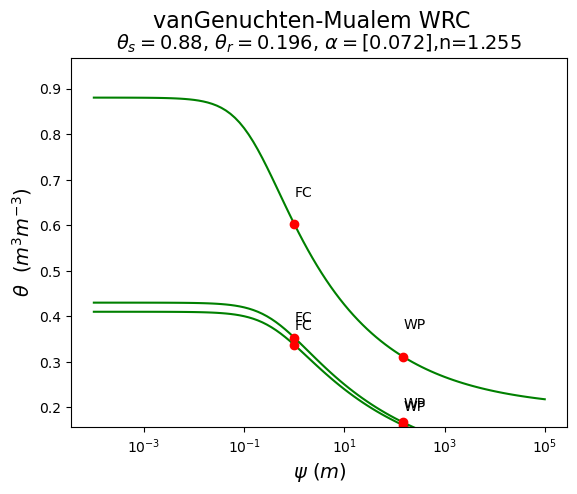

In [6]:
# plotting pF-curves
wrc(theta=np.array(0.3), pF=pFs[1], draw_pF=True)
wrc(theta=np.array(0.3), pF=pFs[2], draw_pF=True)
wrc(theta=np.array(0.3), pF=pFs[4], draw_pF=True)

In [7]:
# looping results to generate water potential array
i = 0
for time in firedata['time']:
    rootmoist = np.ravel(firedata['bucket_moisture_root'].sel(time=time))
    for id in pFs.keys():
        watpot[soiltype == id] = wrc(theta=rootmoist[soiltype == id], pF=pFs[id])
        array = watpot.reshape(250, 375)
    wat_pot_array[i,:,:] = array
    i += 1

/projappl/project_2000908/nousu/SpaFHy_v2.0/soilprofile2D.py:592: RuntimeWarning: invalid value encountered in power
  Psi = -1e-2 / alfa*(s**(1.0 / m) - 1.0)**(1.0 / n)  # m


In [8]:
# assigning water potential to firedata
firedata['bucket_water_potential_root'] = (['time', 'lat', 'lon'],  wat_pot_array)

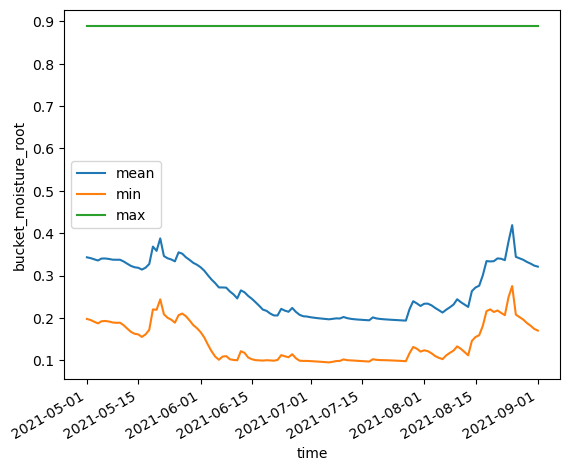

In [9]:
firedata['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01')).mean(dim=['lat', 'lon']).plot(label='mean')
firedata['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01')).min(dim=['lat', 'lon']).plot(label='min')
firedata['bucket_moisture_root'].sel(time=slice('2021-05-01', '2021-09-01')).max(dim=['lat', 'lon']).plot(label='max')
plt.legend()

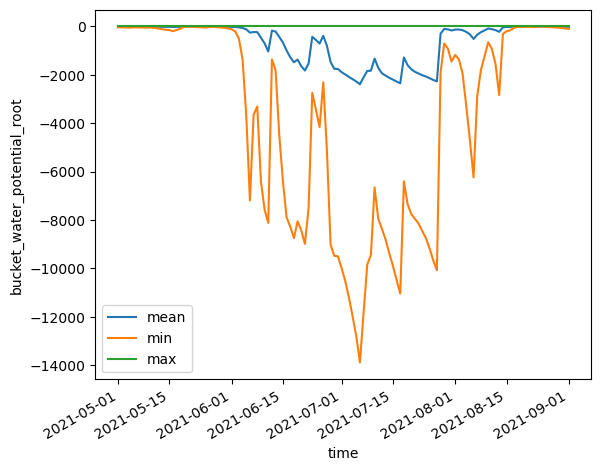

In [10]:
firedata['bucket_water_potential_root'].sel(time=slice('2021-05-01', '2021-09-01')).mean(dim=['lat', 'lon']).plot(label='mean')
firedata['bucket_water_potential_root'].sel(time=slice('2021-05-01', '2021-09-01')).min(dim=['lat', 'lon']).plot(label='min')
firedata['bucket_water_potential_root'].sel(time=slice('2021-05-01', '2021-09-01')).max(dim=['lat', 'lon']).plot(label='max')
plt.legend()

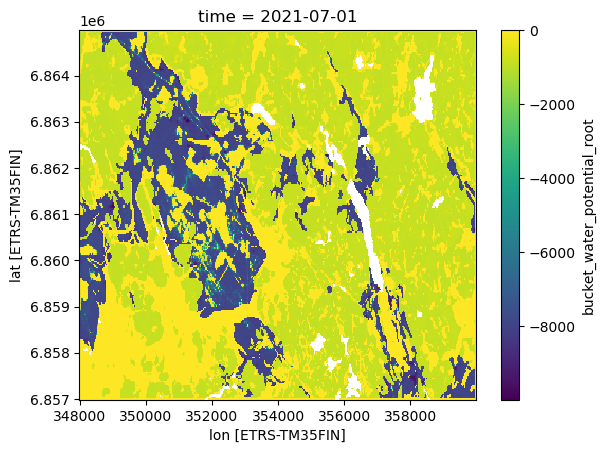

In [11]:
firedata['bucket_water_potential_root'].sel(time='2021-07-01').plot()

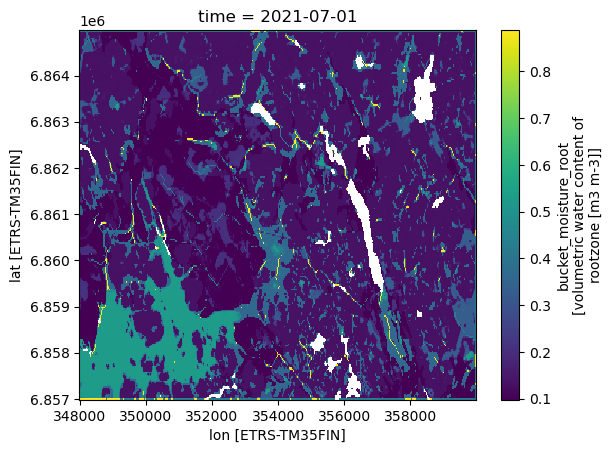

In [12]:
firedata['bucket_moisture_root'].sel(time='2021-07-01').plot()